## Codificación guiada por la variable objetivo o target

En las lecciones anteriores de esta sección, vimos como convertir una etiqueta en un número usando codificación one-hot, reemplazando por un dígito o reemplazando por la frecuencia o número de observaciones. Estos métodos son sencillos, y no (o casi nunca) hacen supuestos y funcionan generalmente bien en una variedad de escenarios.

Hay métodos que por el contrario si permiten capturar  información y a la vez pre-procesar las etiquetas de una variable categórica. Estos métodos incluyen:

- Ordenar las etiquetas de acuerdo al target
- Reemplazar las etiquetas por el promedio del target (codificación por la media / por el target) 
- Reemplazar las etiquetas por el radio de probabilidad del target ser ya sea 1 o 0
- Pesos de evidencia (Weight of evidence)

Todos estos métodos tienen algo en común:
- la codificación es **guiada por el target**, y
- crean una **relación monotónica** entre la variable y el target


### Monotonicidad

Una relación monotónica es una relación que tiene lo siguiente:

- (1) cuando el valor de una variable incrementa, asi mismo sucede con la otra variable; o
- (2) cuando el valor de una variable incrementa, el valor de la otra variable decrece.

En este caso, si el valor de la variable independiente ( predictor) incrementa, lo mismo sucede con el target, o por el contrario, si la variable incrementa, el valor del target decrece.


### Ventajas 

- Captura la información dentro de la categoría, por lo tanto incrementa el poder predictivo de las variables.
- Crea una relación monotónica entre la variable y el target, por lo tanto es adecuada para modelos lineales.
- No expande el espacio de las variables


### Limitaciones

- Tiende a causar sobreajustes
- Es difícil de validar usando las librerías existentes

### Nota

Los métodos discutidos en esta y las próximas 3 lecciones pueden ser usados con variables numéricas, luego de discretizarlas. Esto crea una relación monotónica entre la variable numérica y el target y por lo tanto mejora el desempeño de los modelos lineales. Discutiremos esto en mas detalle en la sección "Discretización"

===============================================================================


## Codificación por la media del target

La codificación por la media implica reemplazar cada categoría por el promedio o la media del valor del target para dicha categoría. Por ejemplo, si tenemos la variable ciudad, con las categorías de Londres, Manchester y Bristol, y queremos predecir cual es la tasa promedio de incumplimiento (para pagos de préstamos), y tenemos que el valor promedio dicha tasa de incumplimiento es 30% para Londres, reemplazamos Londres con 0.3, si la tasa es 20% para Manchester, reemplazamos con 0.20 y asi sucesivamente.

Vamos a realizar codificación por la media usando:
- pandas
- Feature-Engine

y las ventajas y limitaciones de cada una de estas implementaciones usando los datos del Titanic.


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# separar datasets
from sklearn.model_selection import train_test_split

# codificar con feature-engine
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [4]:
# cargar dataset

data = pd.read_csv(
    '../houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [5]:
# miremos cuantas etiquetas tiene cada variable

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

Neighborhood :  25  labels
Exterior1st :  15  labels
Exterior2nd :  16  labels
SalePrice :  663  labels


In [6]:
# exploremos las categorías
data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [7]:
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [8]:
data['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

### Importante sobre codificación

Seleccionados cual dígito asignar a cada categoría usando el set de entrenamiento; y luego usar estos números para codificar las variables en el set de prueba

**Para usar esta técnica con pandas, necesitamos mantener el target en el set de entrenamiento**

In [9]:
# separemos en sets de prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']],  # esta vez mantenemos el target en la variable
    data['SalePrice'],  # target
    test_size=0.3,  # porcentaje de observaciones segmento prueba
    random_state=0)  # seed asegurar reproducibilidad

X_train.shape, X_test.shape

((1022, 4), (438, 4))

### Exploremos la relación original entre las variables categóricas y el target

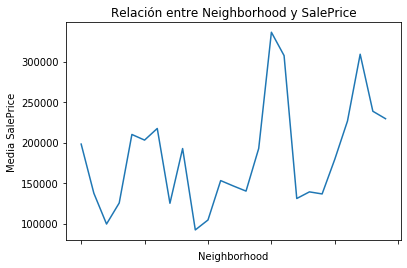

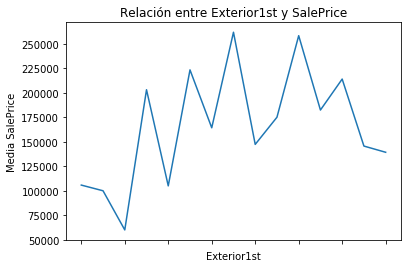

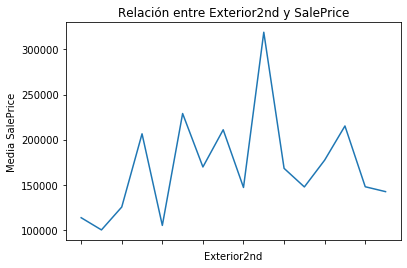

In [10]:
# Exploremos la relación original entre las variables categóricas y el target

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    
    fig= plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relación entre {} y SalePrice'.format(var))
    fig.set_ylabel('Media SalePrice')
    plt.xticks(rotation=45)
    plt.show()

Podemos ver que la relación entre la variable target y las variables categóricas sube y baja, dependiendo de la categoria


## Codificación por números enteros ordenados con pandas


### Ventajas

- rápido
- retorna un pandas dataframe

### Limitaciones:

- no preserva la información del set de entrenamiento para propagarlo al set de prueba

Necesitamos capturar y guardar los mapeos uno por uno, manualmente, si estamos planeando usarlos en producción

In [11]:
# ordenemos las etiquetas de acuerdo al promedio de los valores del target

X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values()

Neighborhood
IDOTRR      92174.166667
BrDale      99440.000000
MeadowV    104441.666667
Edwards    125082.676056
BrkSide    125438.414634
OldTown    130958.328767
Sawyer     136596.442623
Blueste    137500.000000
SWISU      139154.666667
NPkVill    140107.142857
NAmes      146435.264901
Mitchel    153070.444444
SawyerW    179463.088889
Gilbert    192662.290909
NWAmes     192788.235294
Blmngtn    198164.500000
CollgCr    203086.371429
ClearCr    210034.666667
Crawfor    217453.914286
Somerst    226644.196429
Veenker    229500.000000
Timber     238700.100000
NridgHt    307418.137255
StoneBr    309105.937500
NoRidge    336264.666667
Name: SalePrice, dtype: float64

En la celda anterior, ordenamos las categorías de la variable Neighbourhood comenzando por los precios de las casas más baratos (IDOTRR) hasta el barrio donde las casas son más costosas, o en promedio más costosas (NoRidge).

En las siguientes celdas, vamos a reemplazar todas las categorías, ordenadas como están, por los números del 0 a k, donde k es el número de las diferentes categorías menos 1, en este caso 25 - 1 = 24.

Por lo tanto IDOTRR será reemplazado por 0 y NoRidge por 24.

In [12]:
# primero generamos la lista de las etiquetas ordenadas

ordered_labels = X_train.groupby(['Neighborhood'
                                  ])['SalePrice'].mean().sort_values().index

ordered_labels

Index(['IDOTRR', 'BrDale', 'MeadowV', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Somerst', 'Veenker', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [13]:
# ahora creamos un diccionario con el mapeo entre las categorías y números

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'IDOTRR': 0,
 'BrDale': 1,
 'MeadowV': 2,
 'Edwards': 3,
 'BrkSide': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'Gilbert': 13,
 'NWAmes': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'ClearCr': 17,
 'Crawfor': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

In [14]:
# ahora reemplazamos las etiquetas con los números enteros

X_train['Neighborhood'] = X_train['Neighborhood'].map(ordinal_mapping)
X_test['Neighborhood'] = X_test['Neighborhood'].map(ordinal_mapping)

In [15]:
# miremos los resultados

X_train['Neighborhood'].head(10)

64      16
682     17
960      4
1384     3
1100     8
416      6
1034    18
853     10
472      3
1011     3
Name: Neighborhood, dtype: int64

In [16]:
# agrupemos los comandos anteriores en dos funciones

def find_category_mappings(df, variable, target):

    # primero generar la lista de las etiquetas ordenadas
    ordered_labels = X_train.groupby([variable
                                      ])[target].mean().sort_values().index

    # retornar el diccionario con el mapeo
    return {k: i for i, k in enumerate(ordered_labels, 0)}


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [17]:
# ahora repitamos con un ciclo para cada una de las variables categóricas

for variable in ['Exterior1st', 'Exterior2nd']:

    mappings = find_category_mappings(X_train, variable, 'SalePrice')

    integer_encode(X_train, X_test, variable, mappings)

In [18]:
# veamos el resultado

X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,16,11,13,219500
682,17,5,7,173000
960,4,5,8,116500
1384,3,4,4,105000
1100,8,5,7,60000


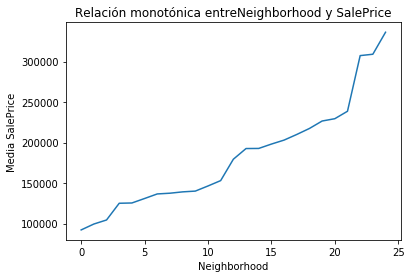

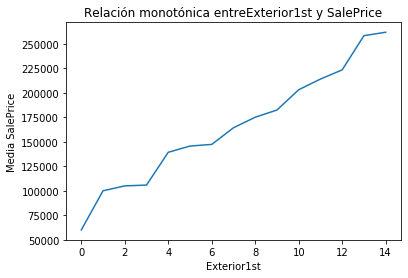

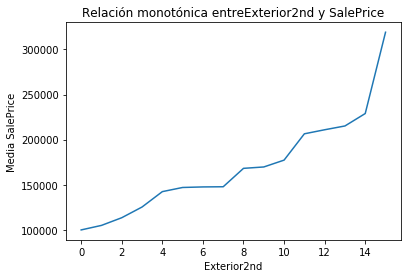

In [19]:
# inspeccionemos la relación monotónica
# entre la variable y el target

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relación monotónica entre{} y SalePrice'.format(var))
    fig.set_ylabel('Media SalePrice')
    plt.show()

Podemos ver de las gráficas que la relación entre las categorías y el target ahora es monotónica, y para las primeras dos variables es casi lineal, que ayuda a mejorar el desempeño de los modelos lineales.

### Nota

Monotonía no significa estrictamente lineal. Monotonía significa que se incrementa ( o decrece) constantemente.

Reemplazar las etiquetas con código anterior siguiendo este método va a generar valores faltantes para las categorías presentes en el segmento de prueba que no se encuentra en el de entrenamiento. Por lo tanto es extremadamente importante, manejar las etiquetas poco comunes con prelación. Explicaremos como hacer esto más adelante en otro notebook.


##  Codificación por números enteros ordenados con Feature-Engine

Si usamos Feature-Engine, en lugar de pandas, no tenemos que mantener la variable target en los datos


In [20]:
# separemos en sets de prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],  # predictores
    data['SalePrice'],  # target
    test_size=0.3,  # porcentaje observaciones prueba
    random_state=0)  # seed asegurar reproducibilidad

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [21]:
ordinal_enc = OrdinalCategoricalEncoder(
    # NOTA necesitamos indicar 'ordered' en el encoding_method, de lo contrario 
    # asigna los números arbitrariamente
    encoding_method='ordered',
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [22]:
# cuando ajustamos el transformador, necesitamos pasar también el target
# al igual que cuando usamos un predictor en Scikit-learn 

ordinal_enc.fit(X_train, y_train)

OrdinalCategoricalEncoder(encoding_method='ordered',
                          variables=['Neighborhood', 'Exterior1st',
                                     'Exterior2nd'])

In [23]:
# en el dict del encoder podemos ver cada una de las categorías más importantes
# seleccionadas por cada variable

ordinal_enc.encoder_dict_

{'Neighborhood': {'IDOTRR': 0,
  'BrDale': 1,
  'MeadowV': 2,
  'Edwards': 3,
  'BrkSide': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'Blueste': 7,
  'SWISU': 8,
  'NPkVill': 9,
  'NAmes': 10,
  'Mitchel': 11,
  'SawyerW': 12,
  'Gilbert': 13,
  'NWAmes': 14,
  'Blmngtn': 15,
  'CollgCr': 16,
  'ClearCr': 17,
  'Crawfor': 18,
  'Somerst': 19,
  'Veenker': 20,
  'Timber': 21,
  'NridgHt': 22,
  'StoneBr': 23,
  'NoRidge': 24},
 'Exterior1st': {'BrkComm': 0,
  'AsphShn': 1,
  'CBlock': 2,
  'AsbShng': 3,
  'WdShing': 4,
  'Wd Sdng': 5,
  'MetalSd': 6,
  'HdBoard': 7,
  'Plywood': 8,
  'Stucco': 9,
  'BrkFace': 10,
  'VinylSd': 11,
  'CemntBd': 12,
  'Stone': 13,
  'ImStucc': 14},
 'Exterior2nd': {'AsphShn': 0,
  'CBlock': 1,
  'AsbShng': 2,
  'Brk Cmn': 3,
  'Wd Shng': 4,
  'MetalSd': 5,
  'Stone': 6,
  'Wd Sdng': 7,
  'Plywood': 8,
  'HdBoard': 9,
  'Stucco': 10,
  'BrkFace': 11,
  'ImStucc': 12,
  'VinylSd': 13,
  'CmentBd': 14,
  'Other': 15}}

In [24]:
# esta es la lista de variables que el codificador transforma

ordinal_enc.variables

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [25]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# exploremos el resutado
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,16,11,13
682,17,5,7
960,4,5,8
1384,3,4,4
1100,8,5,7


**Nota**

Si el argmento 'variables' se fija en 'None' (ninguno), entonces el codificador automáticamente indentificará  **todas las variables categóricas**. Maravilloso verdad?

El codificador no codificará las variables numéricas. Por lo tanto, si algunas de tus variables categóricas son de hecho numéricas, necesita hacer el 're-cast' o cambio a tipo 'object' antes de usar el codificador.

Si hay una variable en el set de prueba, para el cual el codificador no tiene un número para asignar ( la categoría no estaba presente en el set de entrenamiento), el codificador devolverá un error, para alertarte del problema

